# Empirical Exercise 9: Income Growth Before and After Taxes and Transfers

In class, we discussed how the official measure of poverty and certain measures
of household income exclude taxes and many social insurance and transfer
benefits.(Others, like the supplemental poverty measure and more comprehensive
measures of income **do** include taxes and transfers.)

The inclusion or exclusion of tax and transfer policies from measures of
household wellbeing may tell very different stories about how American families
are doing over time. According to the official poverty measure, for example,
there has been little improvement in poverty rates over time, leading some to
conclude (erroneously!) that efforts to reduce poverty have been in vain. At the
other end of the spectrum, some critics argue (also erroneously!) that when you
include taxes and transfers, there has been no increase in income inequality
over time.

The truth is somewhere in between. To get at this issue, today’s assignment is
to take one of the most comprehensive measures of income produced for policy
analysis for the Congressional Budget Office, and examine how tax and transfer 
policies have affected the well-being of American households.

Your goal in the exercise is to understand to what extent tax and transfer 
policies have helped American families, and to what extent it offset increases 
in income inequality. Which households benefitted the most from changes in tax 
and transfer policy over time? After accounting for taxes and transfers, for 
which groups (if any) has inequality increased or declined?

In particular, use the CBO data to identify one group that benefitted 
substantially from changes in tax and transfer policy changes between 1979 and 
2017 and compare them to one other group that benefited less. Did inequality 
(the difference in the growth of after-tax, after-transfer income) between those 
groups decline or increase?

Please measure the change in income for each group on a per-capita basis 
relative to 1979 (form an index). 

Describe your conclusions in a few sentences: who was helped by tax and transfer 
policy? How did these changes affect inequality in income between those groups?  

In [124]:
# Import necessary libraries
import numpy as np 
import pandas as pd

In [125]:
df = pd.read_csv("CBO_income_detail.csv")

keeps = [
    "household_type",
    "income_group",
    "year",
    "market_income",
    "social_insurance_benefits",
    "means_tested_transfers",
    "federal_taxes",
    "num_households",
    "num_people",
]

df = df[keeps]

print(len(df))
df.head()

1560


,household_type,income_group,year,market_income,social_insurance_benefits,means_tested_transfers,federal_taxes,num_households,num_people
0,all_households,all_quintiles,1979,62300,4700,1500,15000,81.1,221.9
1,all_households,all_quintiles,1980,60100,5000,1500,14600,82.6,224.5
2,all_households,all_quintiles,1981,60100,5300,1600,14800,83.8,226.0
3,all_households,all_quintiles,1982,59700,5800,1500,13600,84.3,227.6
4,all_households,all_quintiles,1983,60200,5900,1600,13600,85.8,229.4


In [126]:
# Calculate after-tax-and-transfer income:
# market income plus social insurance benefits
# plus means tested transfers minus federal taxes

df["att_income"] = (df["market_income"]
                 +  df["social_insurance_benefits"]
                 +  df["means_tested_transfers"]
                 -  df["federal_taxes"])

df.head()

,household_type,income_group,year,market_income,social_insurance_benefits,means_tested_transfers,federal_taxes,num_households,num_people,att_income
0,all_households,all_quintiles,1979,62300,4700,1500,15000,81.1,221.9,53500
1,all_households,all_quintiles,1980,60100,5000,1500,14600,82.6,224.5,52000
2,all_households,all_quintiles,1981,60100,5300,1600,14800,83.8,226.0,52200
3,all_households,all_quintiles,1982,59700,5800,1500,13600,84.3,227.6,53400
4,all_households,all_quintiles,1983,60200,5900,1600,13600,85.8,229.4,54100


In [127]:
df["income_group"].unique()

array(['all_quintiles', 'lowest_quintile', 'second_quintile',
       'middle_quintile', 'fourth_quintile', 'highest_quintile',
       'percentiles_81_90', 'percentiles_91_95', 'percentiles_96_99',
       'top_1_percent'], dtype=object)

In [128]:
comp_types = [
    "lowest_quintile",
    "middle_quintile",
    "highest_quintile"
]

grps = df[df["income_group"].isin(comp_types)].groupby(by=["year", "income_group"])
sum_df = grps.sum()

sum_df["percap_minc"] = ((sum_df["market_income"] * sum_df["num_households"]) /
                         (sum_df["num_people"]))
sum_df["percap_attinc"] = ((sum_df["att_income"] * sum_df["num_households"]) /
                         (sum_df["num_people"]))

sum_df

market_income  social_insurance_benefits  \
year income_group                                                 
1979 highest_quintile         631800                      19200   
     lowest_quintile           33600                      34500   
     middle_quintile          209100                      22100   
1980 highest_quintile         606500                      20200   
     lowest_quintile           30100                      36100   
...                              ...                        ...   
2016 lowest_quintile           40600                      65200   
     middle_quintile          260600                      49700   
2017 highest_quintile        1286300                      42100   
     lowest_quintile           41100                      64700   
     middle_quintile          266300                      48500   

                       means_tested_transfers  federal_taxes  num_households  \
year income_group                                                              
1979 highest_quintile                     600         181500            32.8   
     lowest_quintile                    19700           4600            38.2   
     middle_quintile                     1700          43300            29.2   
1980 highest_quintile                     600         171900            33.6   
     lowest_quintile                    20300           3800            38.8   
...                                       ...            ...             ...   
2016 lowest_quintile                    55400           -400            59.5   
     middle_quintile                    14500          43600            47.5   
2017 highest_quintile                    3900         349300            49.4   
     lowest_quintile                    55100           -700            59.4   
     middle_quintile                    15200          44400            48.0   

                       num_people  att_income    percap_minc  percap_attinc  
year income_group                                                            
1979 highest_quintile        88.9      470100  233105.061867  173445.219348  
     lowest_quintile         86.3       83200   14872.769409   36827.809965  
     middle_quintile         88.8      189600   68758.108108   62345.945946  
1980 highest_quintile        89.8      455400  226930.957684  170394.654788  
     lowest_quintile         86.7       82700   13470.357555   37009.919262  
...                           ...         ...            ...            ...  
2016 lowest_quintile        121.0      161600   19964.462810   79464.462810  
     middle_quintile        124.8      281200   99186.698718  107027.243590  
2017 highest_quintile       126.1      983000  503911.340206  385092.783505  
     lowest_quintile        122.2      161600   19978.232406   78551.882160  
     middle_quintile        126.0      285600  101447.619048  108800.000000  

[117 rows x 9 columns]

In [129]:
baseline = sum_df.loc[1979, :]

sum_df["minc_idx"] = sum_df["percap_minc"]
sum_df["attinc_idx"] = sum_df["percap_attinc"]

for c in comp_types:
    sum_df.loc[
        (df["year"].unique(), c),
        "minc_idx"
    ] /= baseline.loc[c]["percap_minc"]

    sum_df.loc[
        (df["year"].unique(), c),
        "attinc_idx"
    ] /= baseline.loc[c]["percap_attinc"]

sum_df["minc_idx"] -= 1
sum_df["attinc_idx"] -= 1

sum_df

market_income  social_insurance_benefits  \
year income_group                                                 
1979 highest_quintile         631800                      19200   
     lowest_quintile           33600                      34500   
     middle_quintile          209100                      22100   
1980 highest_quintile         606500                      20200   
     lowest_quintile           30100                      36100   
...                              ...                        ...   
2016 lowest_quintile           40600                      65200   
     middle_quintile          260600                      49700   
2017 highest_quintile        1286300                      42100   
     lowest_quintile           41100                      64700   
     middle_quintile          266300                      48500   

                       means_tested_transfers  federal_taxes  num_households  \
year income_group                                                              
1979 highest_quintile                     600         181500            32.8   
     lowest_quintile                    19700           4600            38.2   
     middle_quintile                     1700          43300            29.2   
1980 highest_quintile                     600         171900            33.6   
     lowest_quintile                    20300           3800            38.8   
...                                       ...            ...             ...   
2016 lowest_quintile                    55400           -400            59.5   
     middle_quintile                    14500          43600            47.5   
2017 highest_quintile                    3900         349300            49.4   
     lowest_quintile                    55100           -700            59.4   
     middle_quintile                    15200          44400            48.0   

                       num_people  att_income    percap_minc  percap_attinc  \
year income_group                                                             
1979 highest_quintile        88.9      470100  233105.061867  173445.219348   
     lowest_quintile         86.3       83200   14872.769409   36827.809965   
     middle_quintile         88.8      189600   68758.108108   62345.945946   
1980 highest_quintile        89.8      455400  226930.957684  170394.654788   
     lowest_quintile         86.7       82700   13470.357555   37009.919262   
...                           ...         ...            ...            ...   
2016 lowest_quintile        121.0      161600   19964.462810   79464.462810   
     middle_quintile        124.8      281200   99186.698718  107027.243590   
2017 highest_quintile       126.1      983000  503911.340206  385092.783505   
     lowest_quintile        122.2      161600   19978.232406   78551.882160   
     middle_quintile        126.0      285600  101447.619048  108800.000000   

                       minc_idx  attinc_idx  
year income_group                            
1979 highest_quintile  0.000000    0.000000  
     lowest_quintile   0.000000    0.000000  
     middle_quintile   0.000000    0.000000  
1980 highest_quintile -0.026486   -0.017588  
     lowest_quintile  -0.094294    0.004945  
...                         ...         ...  
2016 lowest_quintile   0.342350    1.157730  
     middle_quintile   0.442545    0.716667  
2017 highest_quintile  1.161735    1.220256  
     lowest_quintile   0.343276    1.132950  
     middle_quintile   0.475428    0.745101  

[117 rows x 11 columns]

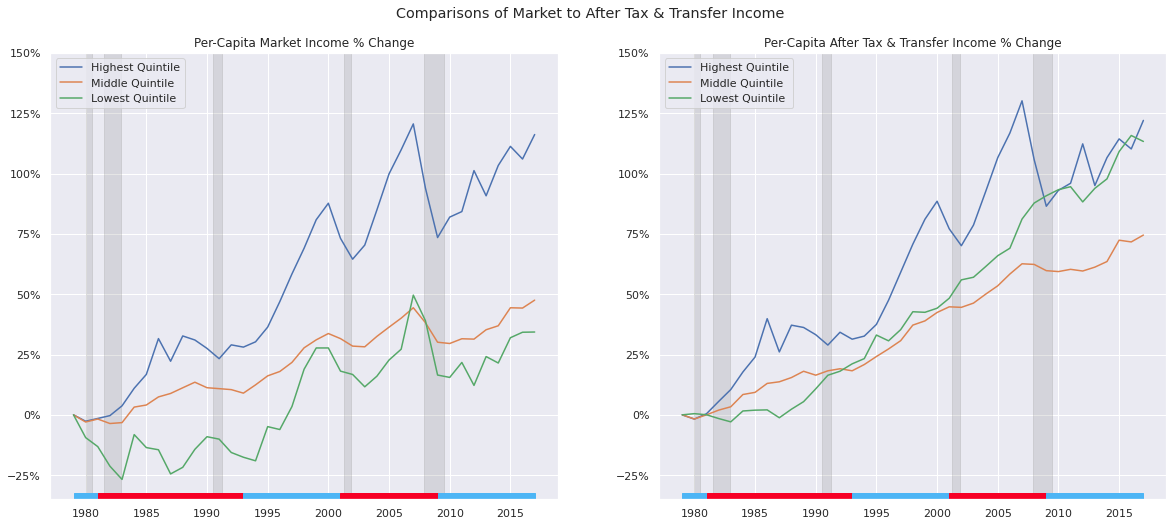

In [136]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set_theme()

fig: plt.Figure = plt.figure(figsize=(20, 8))
plt.suptitle("Comparisons of Market to After Tax & Transfer Income")
fig.subplots_adjust(top=0.9)
gs = GridSpec(nrows=1, ncols=2)

years = df["year"].unique()

ax0: plt.Axes = fig.add_subplot(gs[0, 0])
ax0.plot(
    years,
    sum_df.loc[(years, "highest_quintile"), "minc_idx"],
    label="Highest Quintile"
)

ax0.plot(
    years,
    sum_df.loc[(years, "middle_quintile"), "minc_idx"],
    label="Middle Quintile"
)

ax0.plot(
    years,
    sum_df.loc[(years, "lowest_quintile"), "minc_idx"],
    label="Lowest Quintile"
)

ax1: plt.Axes = fig.add_subplot(gs[0, 1])
ax1.plot(
    years,
    sum_df.loc[(years, "highest_quintile"), "attinc_idx"],
    label="Highest Quintile"
)

ax1.plot(
    years,
    sum_df.loc[(years, "middle_quintile"), "attinc_idx"],
    label="Middle Quintile"
)

ax1.plot(
    years,
    sum_df.loc[(years, "lowest_quintile"), "attinc_idx"],
    label="Lowest Quintile"
)

ax0.set_title("Per-Capita Market Income % Change")
ax1.set_title("Per-Capita After Tax & Transfer Income % Change")

presidents = [
    [1979, "#4cb5f5"],
    [1981, "#f70025"],
    [1989, "#f70025"],
    [1993, "#4cb5f5"],
    [2001, "#f70025"],
    [2009, "#4cb5f5"],
    [2017, "#f70025"],
]

recessions = [
    [1980, 1980.5],
    [1981.5, 1982.9],
    [1990.5, 1991.25],
    [2001.25, 2001.9],
    [2007.9, 2009.5],
]

for ax in fig.axes:
    ax.set_ylim([-0.35, 1.5])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.legend(loc="upper left")
    for i in range(len(recessions)):
        ax.axvspan(recessions[i][0], recessions[i][1], color="grey", alpha=0.2)

    for i in range(len(presidents) - 1):
        ax.axvspan(presidents[i][0], presidents[i + 1][0], color=presidents[i][1], alpha=1, ymin = 0, ymax=0.015)

plt.savefig("analysis.pdf", dpi=750)
plt.show()